# Importing Libraries and DataFrames

In [16]:
#Importing all the required libraries:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#Reading Data from File:
def read_data(file_name):
    df = pd.read_csv(file_name)
    return df

In [3]:
df=read_data('books.csv')

In [4]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


# Checking DataFrame:

In [6]:
#Counting Total Rows:
def count_rows(df):
    if type(df).__name__ != "DataFrame":
        raise Exception("Given Data is not a DataFrame.")
    return df.shape[0]

In [7]:
count_rows(df)

6810

In [8]:
#Counting Total Columns:
def count_cols(df):
    if type(df).__name__ != "DataFrame":
        raise Exception("Given Data is not a DataFrame")
    return df.shape[1]

In [9]:
count_cols(df)

12

In [10]:
#Displaing Column Names:
def col_names(df):
    if type(df).__name__ != "DataFrame":
        raise Exception("Given Data is not a DataFrame")
    return df.columns.tolist()

In [13]:
col_names(df)

['title',
 'authors',
 'categories',
 'thumbnail',
 'description',
 'published_year',
 'average_rating']

# Filtering the DataFrame:

In [6]:
df.drop(['isbn10', 'isbn13','subtitle','ratings_count','num_pages'], axis='columns', inplace=True)

In [40]:
data_copy=df
data_copy.head()

,title,authors,categories,thumbnail,description,published_year,average_rating
1437,"""A"" is for Abductive",Leonard I. Sweet;Brian D. McLaren;Jerry Haselm...,Religion,http://books.google.com/books/content?id=y408k...,A Is for Abductive B is for Body C is for Carp...,2003,3.17
4948,"""Gorgias"" and ""Phaedrus""",Plato,Philosophy,http://books.google.com/books/content?id=vBmKQ...,With a masterful sense of the place of rhetori...,1998,4.41
2404,"""What Do You Care what Other People Think?""",Richard Phillips Feynman;Ralph Leighton,BIOGRAPHY & AUTOBIOGRAPHY,http://books.google.com/books/content?id=LUrJI...,This two-part profile of the late Nobel Prize-...,2001,4.27
6367,$30 Film School,Michael Wareham Dean,Computers,http://books.google.com/books/content?id=MwSM8...,Demonstrating how to make a film with the help...,2003,3.52
6809,'I'm Telling You Stories',Helena Grice;Tim Woods,Literary Criticism,http://books.google.com/books/content?id=2lVyR...,This is a jubilant and rewarding collection of...,1998,3.70


In [15]:
df.describe()


,published_year,average_rating
count,6804.000000,6767.000000
mean,1998.630364,3.933284
std,10.484257,0.331352
min,1853.000000,0.000000
25%,1996.000000,3.770000
50%,2002.000000,3.960000
75%,2005.000000,4.130000
max,2019.000000,5.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5617 entries, 1437 to 3298
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           5617 non-null   object 
 1   authors         5617 non-null   object 
 2   categories      5617 non-null   object 
 3   thumbnail       5617 non-null   object 
 4   description     5617 non-null   object 
 5   published_year  5617 non-null   float64
 6   average_rating  5617 non-null   float64
dtypes: float64(2), object(5)
memory usage: 351.1+ KB


In [7]:
#is there any null value in our dataset.
df.isnull().sum()

title               0
authors            72
categories         99
thumbnail         329
description       262
published_year      6
average_rating     43
dtype: int64

In [10]:
df=df.dropna()
count_rows(df)

NameError: name 'count_rows' is not defined

In [9]:
df.isnull().sum()

title             0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
dtype: int64

In [11]:
df.sort_values("title", inplace = True)
df.drop_duplicates(subset ="title",keep = False, inplace = True)


,title,authors,categories,thumbnail,description,published_year,average_rating
1437,"""A"" is for Abductive",Leonard I. Sweet;Brian D. McLaren;Jerry Haselm...,Religion,http://books.google.com/books/content?id=y408k...,A Is for Abductive B is for Body C is for Carp...,2003.0,3.17
4948,"""Gorgias"" and ""Phaedrus""",Plato,Philosophy,http://books.google.com/books/content?id=vBmKQ...,With a masterful sense of the place of rhetori...,1998.0,4.41
2404,"""What Do You Care what Other People Think?""",Richard Phillips Feynman;Ralph Leighton,BIOGRAPHY & AUTOBIOGRAPHY,http://books.google.com/books/content?id=LUrJI...,This two-part profile of the late Nobel Prize-...,2001.0,4.27
6367,$30 Film School,Michael Wareham Dean,Computers,http://books.google.com/books/content?id=MwSM8...,Demonstrating how to make a film with the help...,2003.0,3.52
6809,'I'm Telling You Stories',Helena Grice;Tim Woods,Literary Criticism,http://books.google.com/books/content?id=2lVyR...,This is a jubilant and rewarding collection of...,1998.0,3.70
...,...,...,...,...,...,...,...
5607,זן ואומנות האושר,Chris Prentiss,Philosophy,http://books.google.com/books/content?id=d-MEL...,The gentle wisdom of this resource explains ho...,2006.0,4.04
6794,ゲンジモノガタリ,紫式部,Japan,http://books.google.com/books/content?id=MRT-W...,源氏物語54帖、「宮田切り絵」の真骨頂。,2001.0,3.76
6795,五輪書 : 英文版,武蔵·宮本,Philosophy,http://books.google.com/books/content?id=6IAPM...,Book Of Five Rings is a Kodansha International...,2002.0,4.08
6796,日本語の感情表現集,村上真美子,Foreign Language Study,http://books.google.com/books/content?id=ST7ru...,This is a student's guide to the expression of...,2002.0,3.54


In [21]:
col_names(df)


['title',
 'authors',
 'categories',
 'thumbnail',
 'description',
 'published_year',
 'average_rating']

In [13]:
#Converting Data Types:
df.published_year=df.published_year.astype('int64')
df.title=df.title.astype('string')
df.authors=df.authors.astype('string')
df.categories=df.categories.astype('string')
df.description=df.description.astype('string')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5617 entries, 1437 to 3298
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           5617 non-null   string 
 1   authors         5617 non-null   string 
 2   categories      5617 non-null   string 
 3   thumbnail       5617 non-null   object 
 4   description     5617 non-null   string 
 5   published_year  5617 non-null   int64  
 6   average_rating  5617 non-null   float64
dtypes: float64(1), int64(1), object(1), string(4)
memory usage: 351.1+ KB


In [46]:
df.head()

,title,authors,categories,thumbnail,description,published_year,average_rating
0,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004,3.85
1,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000,3.83
2,The One Tree,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982,3.97
3,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993,3.93
4,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002,4.15


In [24]:
df.sort_values("title", inplace = True)
df.drop_duplicates(subset ="title",keep = False, inplace = True)
df

F:\Python\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,title,authors,categories,thumbnail,description,published_year,average_rating
1437,"""A"" is for Abductive",Leonard I. Sweet;Brian D. McLaren;Jerry Haselm...,Religion,http://books.google.com/books/content?id=y408k...,A Is for Abductive B is for Body C is for Carp...,2003,3.17
4948,"""Gorgias"" and ""Phaedrus""",Plato,Philosophy,http://books.google.com/books/content?id=vBmKQ...,With a masterful sense of the place of rhetori...,1998,4.41
2404,"""What Do You Care what Other People Think?""",Richard Phillips Feynman;Ralph Leighton,BIOGRAPHY & AUTOBIOGRAPHY,http://books.google.com/books/content?id=LUrJI...,This two-part profile of the late Nobel Prize-...,2001,4.27
6367,$30 Film School,Michael Wareham Dean,Computers,http://books.google.com/books/content?id=MwSM8...,Demonstrating how to make a film with the help...,2003,3.52
6809,'I'm Telling You Stories',Helena Grice;Tim Woods,Literary Criticism,http://books.google.com/books/content?id=2lVyR...,This is a jubilant and rewarding collection of...,1998,3.70
...,...,...,...,...,...,...,...
5607,זן ואומנות האושר,Chris Prentiss,Philosophy,http://books.google.com/books/content?id=d-MEL...,The gentle wisdom of this resource explains ho...,2006,4.04
6794,ゲンジモノガタリ,紫式部,Japan,http://books.google.com/books/content?id=MRT-W...,源氏物語54帖、「宮田切り絵」の真骨頂。,2001,3.76
6795,五輪書 : 英文版,武蔵·宮本,Philosophy,http://books.google.com/books/content?id=6IAPM...,Book Of Five Rings is a Kodansha International...,2002,4.08
6796,日本語の感情表現集,村上真美子,Foreign Language Study,http://books.google.com/books/content?id=ST7ru...,This is a student's guide to the expression of...,2002,3.54


In [52]:
count_rows(df)

5617

In [25]:
# Removing zeros from two Columns i.e Published Year and Average rating.
df= df.query("published_year != '0'")
df=df.query("average_rating != '0'")


# Preparing DataFrame:

In [54]:
col_names(df)

['title',
 'authors',
 'categories',
 'thumbnail',
 'description',
 'published_year',
 'average_rating']

In [117]:
df['new_col']= df['authors']+","+df['categories']

In [134]:
df.head()

,title,authors,categories,thumbnail,description,published_year,average_rating,combined
0,"""A"" is for Abductive",Leonard I. Sweet;Brian D. McLaren;Jerry Haselm...,Religion,http://books.google.com/books/content?id=y408k...,A Is for Abductive B is for Body C is for Carp...,2003,3.17,leonardi.sweet briand.mclaren jerryhaselmayer ...
1,"""Gorgias"" and ""Phaedrus""",Plato,Philosophy,http://books.google.com/books/content?id=vBmKQ...,With a masterful sense of the place of rhetori...,1998,4.41,plato philosophy
2,"""What Do You Care what Other People Think?""",Richard Phillips Feynman;Ralph Leighton,BIOGRAPHY & AUTOBIOGRAPHY,http://books.google.com/books/content?id=LUrJI...,This two-part profile of the late Nobel Prize-...,2001,4.27,richardphillipsfeynman ralphleighton biography...
3,$30 Film School,Michael Wareham Dean,Computers,http://books.google.com/books/content?id=MwSM8...,Demonstrating how to make a film with the help...,2003,3.52,michaelwarehamdean computers
4,'I'm Telling You Stories',Helena Grice;Tim Woods,Literary Criticism,http://books.google.com/books/content?id=2lVyR...,This is a jubilant and rewarding collection of...,1998,3.70,helenagrice timwoods literarycriticism


In [119]:
def set_combined(x):
    x=np.char.lower(x)
    x=np.char.replace(x," ", "")
    x=np.char.replace(x,","," ")
    x=np.char.replace(x,";"," ")
    x=np.char.replace(x,"("," ")
    x=np.char.replace(x,")"," ")
    x=np.char.replace(x,"&"," ")
    return x

In [120]:
df['combined']=df['new_col'].apply(set_combined)

In [96]:
df.published_year=df.published_year.astype('int64')

In [121]:
# droping new_col column as it is not needed any more
df.drop('new_col', inplace=True, axis=1)

In [122]:
# Reseting index because index is not in continuos order
df.reset_index(drop=True, inplace=True)

In [123]:
df

,title,authors,categories,thumbnail,description,published_year,average_rating,combined
0,"""A"" is for Abductive",Leonard I. Sweet;Brian D. McLaren;Jerry Haselm...,Religion,http://books.google.com/books/content?id=y408k...,A Is for Abductive B is for Body C is for Carp...,2003,3.17,leonardi.sweet briand.mclaren jerryhaselmayer ...
1,"""Gorgias"" and ""Phaedrus""",Plato,Philosophy,http://books.google.com/books/content?id=vBmKQ...,With a masterful sense of the place of rhetori...,1998,4.41,plato philosophy
2,"""What Do You Care what Other People Think?""",Richard Phillips Feynman;Ralph Leighton,BIOGRAPHY & AUTOBIOGRAPHY,http://books.google.com/books/content?id=LUrJI...,This two-part profile of the late Nobel Prize-...,2001,4.27,richardphillipsfeynman ralphleighton biography...
3,$30 Film School,Michael Wareham Dean,Computers,http://books.google.com/books/content?id=MwSM8...,Demonstrating how to make a film with the help...,2003,3.52,michaelwarehamdean computers
4,'I'm Telling You Stories',Helena Grice;Tim Woods,Literary Criticism,http://books.google.com/books/content?id=2lVyR...,This is a jubilant and rewarding collection of...,1998,3.70,helenagrice timwoods literarycriticism
...,...,...,...,...,...,...,...,...
5612,זן ואומנות האושר,Chris Prentiss,Philosophy,http://books.google.com/books/content?id=d-MEL...,The gentle wisdom of this resource explains ho...,2006,4.04,chrisprentiss philosophy
5613,ゲンジモノガタリ,紫式部,Japan,http://books.google.com/books/content?id=MRT-W...,源氏物語54帖、「宮田切り絵」の真骨頂。,2001,3.76,紫式部 japan
5614,五輪書 : 英文版,武蔵·宮本,Philosophy,http://books.google.com/books/content?id=6IAPM...,Book Of Five Rings is a Kodansha International...,2002,4.08,武蔵·宮本 philosophy
5615,日本語の感情表現集,村上真美子,Foreign Language Study,http://books.google.com/books/content?id=ST7ru...,This is a student's guide to the expression of...,2002,3.54,村上真美子 foreignlanguagestudy


In [26]:
df.head()

,title,authors,categories,thumbnail,description,published_year,average_rating
1437,"""A"" is for Abductive",Leonard I. Sweet;Brian D. McLaren;Jerry Haselm...,Religion,http://books.google.com/books/content?id=y408k...,A Is for Abductive B is for Body C is for Carp...,2003,3.17
4948,"""Gorgias"" and ""Phaedrus""",Plato,Philosophy,http://books.google.com/books/content?id=vBmKQ...,With a masterful sense of the place of rhetori...,1998,4.41
2404,"""What Do You Care what Other People Think?""",Richard Phillips Feynman;Ralph Leighton,BIOGRAPHY & AUTOBIOGRAPHY,http://books.google.com/books/content?id=LUrJI...,This two-part profile of the late Nobel Prize-...,2001,4.27
6367,$30 Film School,Michael Wareham Dean,Computers,http://books.google.com/books/content?id=MwSM8...,Demonstrating how to make a film with the help...,2003,3.52
6809,'I'm Telling You Stories',Helena Grice;Tim Woods,Literary Criticism,http://books.google.com/books/content?id=2lVyR...,This is a jubilant and rewarding collection of...,1998,3.70


In [76]:
def best_year(df):
    book_year=df.groupby('published_year')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('published_year')
    plt.figure(figsize=(15,10))
    ax=sns.barplot(book_year['title'],book_year.index,palette="inferno")
    ax.set_title("Categories with most books: ")
    ax.set_xlabel("Total Number of Books: ")
    

In [80]:
df.published_year=df.published_year.astype('string')
book_author=df.groupby('published_year')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('published_year')
book_author

,title
published_year,
2006,792
2005,595
2004,512
2003,472
2002,404
2001,346
2000,293
2007,238
1999,231


F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

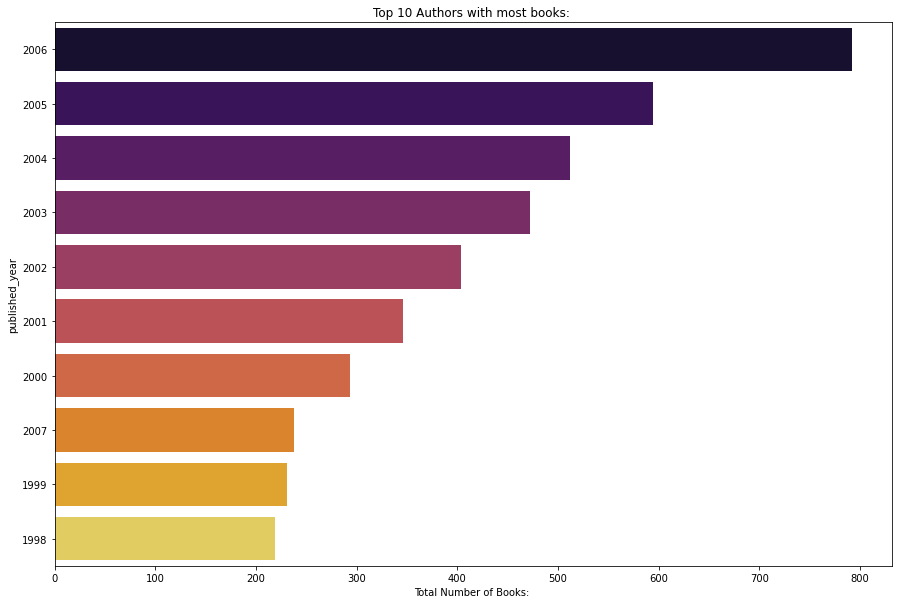

In [81]:
plt.figure(figsize=(15,10))
ax=sns.barplot(book_author['title'],book_author.index,palette="inferno")
ax.set_title("Top 10 Authors with most books: ")
ax.set_xlabel("Total Number of Books: ")
plt.show

##### Saving DataFrame:

In [124]:
# DataFrame to pickle file
df.to_pickle('filtered_books.pkl')
# DataFrame to csv file
df.to_csv('filtered_books.csv')